<a href="https://colab.research.google.com/github/kiran9615/EDA_airbnb-hosting-data-analysis/blob/main/Airbnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.***

# ***This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.***

***Explore and analyze the data to discover key understandings (not limited to these) such as :***

*What can we learn about different hosts and areas?*

*What can we learn from predictions? (ex: locations, prices, reviews, etc)*

*Which hosts are the busiest and why?*

*Is there any noticeable difference of traffic among different areas and what could be the reason for it?*

In [3]:
#importing all the necessary modules required during the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting googlr drive in colab
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reading airbnb NYC 2019 csv data and storing it in airbnbNY_data dataframe
file_path='/content/drive/MyDrive/Datascience/Datasets/Airbnb NYC 2019.csv'
airbnbNY_data=pd.read_csv(file_path)

# ***Part 1: Basic datapreprocessing and Cleaning***

In [5]:
#----------------------Block 1----------------------------------

#checking for no. of observations and features in our dataset
airbnbNY_data.shape

(48895, 16)

*We have a listings of 48895 observations with 16 features*

In [6]:
#----------------------Block 2----------------------------------

# visualising first 5 observations from our dataset 
airbnbNY_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


 ****Data Dictionary****

*1. ID - ID is just an unique identifier of each row.*

*2. Name - It is a rental name which user sees while booking(hotel name).*

*3. Host ID - Every host on Airbnb gets an unique host id, host id here represents that id only.*

*4. Host name - Name of the host.*

*5. Neighbourhood_group - Whole New York is divied into 5 neighbourhood_group(boroughs) regionally. It shows in which borough particular listing is located.*

*6. Neighbourhood - Each borough is further sub divided into neighbourhoods. This column shows the neighbourhood of particular listing.*

*7. Latitude and longitude - These shows the geographical positions of a rental.*

*8. Room_Type -  Which room type a rental is offering.*

*9. Price - Price per night that a rental is charging.*

*10. Minimum Nights - For this much of nights minimally rental can be booked.*

*11. Number of reviews - Number of reviews a rental has got till now.*

*12. Review Per month - An average no. of reviews that a rental got per month.*

*13. Last review - Date on which a rental got their last review.*

*14. calculated_host_listings_count -  It is the no. of rentals a host is hosting in the dataset.*

*15. Availability 365 - It is the no. of days for which a rental is available to book.*

*NOTE - I have used the word rentals, listings and hostings interchangably here. All of these means the same.*

In [7]:
#----------------------Block 3----------------------------------

#getting basic information about dataset
airbnbNY_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

*Outcomes*

*1. Dataype of each columns*

*2. Memory usage due to dataset*

*3. Number of non null values in each columns*


In [8]:
#----------------------Block 4----------------------------------

# getting count of each null values in each column
airbnbNY_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

*1. Although Name and Host name has null values but it won't be of significant use in our analysis, we won't be caring much about it.*

*2. Last review and review per month both have same number of null values. Actual reason is they are interdependent. Last_review includes a date of last review of specific listing. If it is null that means listing hasn't got any reviews yet and for the same reason review per moth is also null.*

*3. If you look for the observations having review_per_month and last_review as null values, logiclly no. of reviews value should be zero there. So, lets verify this.* 



In [9]:
#----------------------Block 5----------------------------------

# checking for number_of_review unique values where we have null values for last_review and review_per_month 
airbnbNY_data[airbnbNY_data['last_review'].isnull() & airbnbNY_data['reviews_per_month'].isnull()]['number_of_reviews'].value_counts()

0    10052
Name: number_of_reviews, dtype: int64

*We will delete the last review column from dataframe as that is not much useful in terms of further data analysis and make reviews_per_ month  0 where reviews_per_month is Null.*

In [10]:
#----------------------Block 6----------------------------------

airbnbNY_data.drop(['last_review'],axis = 1, inplace = True)   # dropping last review column
airbnbNY_data['reviews_per_month'].fillna(0,inplace=True)    #filling null values with 0 in reviews_per_month column

*Name of hotel is also not of a significant use to us so we'll drop that as well*

In [11]:
#----------------------Block 7----------------------------------

airbnbNY_data.drop(['name'],axis = 1, inplace = True)   # dropping name column
airbnbNY_data.drop(['host_name'],axis = 1, inplace = True)   # dropping host_name column

In [12]:
#----------------------Block 8----------------------------------

#null values check
airbnbNY_data.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

*We have treated null values and dropped all unneccesary columns as well .*

In [13]:
#----------------------Block 9----------------------------------

#checking for descriptive summary of data
airbnbNY_data.drop(['id','host_id','latitude','longitude'], axis =1).describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


*Descriptive table tells us that except availability 365, all other features has some serious outliers.*

*As a part of this project we are only performing EDA .So there might not be a need of outlier treatment but in some specific cases outliers affects our EDA task as well. So we'll look for temporary treatment at that point.*


# ***Part 2: Feature analysis and engineering***

##***1 .Visualising and analysing about different areas(neighbourhood and boroughs)***

In [14]:
#----------------------Block 10----------------------------------

# unique categories in neighbourhood_group
airbnbNY_data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

*1. There are total of 5 neighbourhood groups.*


*2. In New York whole New York city has been divided in these(neighbourhood_group) five adminstrative region and these are called borough there. So we will rename the neighbourhood_group columns to borough for better comprehensiveness.*


In [15]:
#----------------------Block 11----------------------------------

airbnbNY_data.rename(columns={'neighbourhood_group':'borough'}, inplace=True) # renaming neighbourhood group column to borough

In [16]:
#----------------------Block 12----------------------------------


airbnbNY_data.head()  # data check for column rename 

,id,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


###**Lets look into how hosting is divided among these boroughs**

In [17]:
#----------------------Block 13----------------------------------

#checking for the observations under each borough
borough_hositing = airbnbNY_data['borough'].value_counts().sort_values(ascending=False)
borough_hositing

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: borough, dtype: int64

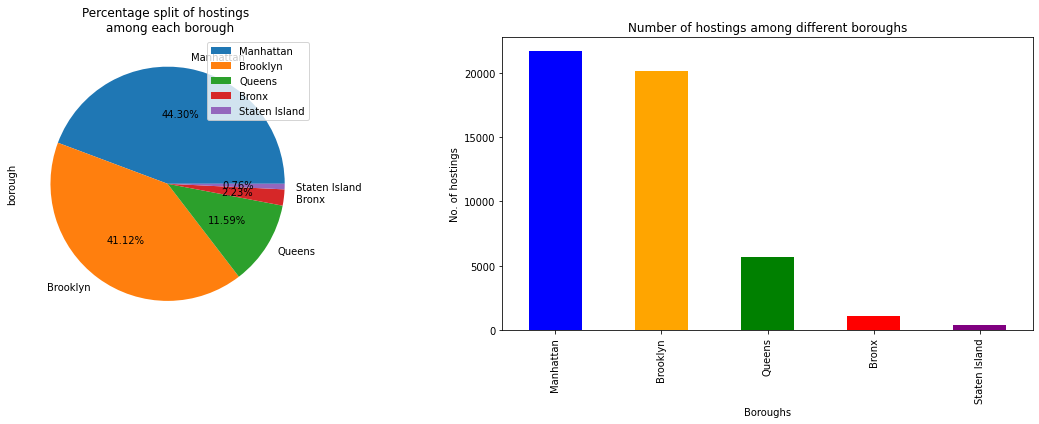

In [18]:
#----------------------Block 14----------------------------------

#plotting the above found details
fig,axes= plt.subplots(1,2,figsize=(16,6))
borough_hositing.plot.pie(autopct = '%1.2f%%', ax = axes[0]) #pie plot
axes[0].set_title('Percentage split of hostings \n among each borough')  # title for pie plot
axes[0].legend()
borough_hositing.plot.bar(ax = axes[1],color=['blue','orange','green','red','purple'])  #bar plot
axes[1].set_title('Number of hostings among different boroughs')  # title for bar plot
axes[1].set(ylabel='No. of hostings', xlabel='Boroughs')   # labelling y and x axis
fig.tight_layout() #for creating proper spacing and arrangement among different figures on canvas

*From above charts we can see that major no. of hostings are from Brooklyn and Manhattan from this listing of airbnb New York city whereas Staten Island and Bronx are way too less populous in terms of hostings.*

*Actually Manhattan is one of  the most attracted tourism borough in New York called to be as a heart of New York city and Brooklyn follows after Manhattan and also it is most populous borough that is one of the strong reason for Brooklyn and Manhattan to be dominating in terms of hostings.* 


###**Checking for some of the top neighbourhoods and to which borough they belong**




*Note : We are qualifying neighbourhood as top on the basis of number of hostings.*



In [19]:
#----------------------Block 15----------------------------------

#grouping observation on borough first and then on neighbourhood and then picking up their count
top_20_neighbourhood = airbnbNY_data.groupby(['borough','neighbourhood']).agg({'id':'count'}).sort_values(by='id',ascending=False)[0:20].reset_index()
top_20_neighbourhood.rename(columns={'id':'num of hostings'},inplace=True)
top_20_neighbourhood

,borough,neighbourhood,num of hostings
0,Brooklyn,Williamsburg,3920
1,Brooklyn,Bedford-Stuyvesant,3714
2,Manhattan,Harlem,2658
3,Brooklyn,Bushwick,2465
4,Manhattan,Upper West Side,1971
5,Manhattan,Hell's Kitchen,1958
6,Manhattan,East Village,1853
7,Manhattan,Upper East Side,1798
8,Brooklyn,Crown Heights,1564
9,Manhattan,Midtown,1545


Text(0.5, 1.0, 'Top 20 neighbourhoods in terms of number of hostings')

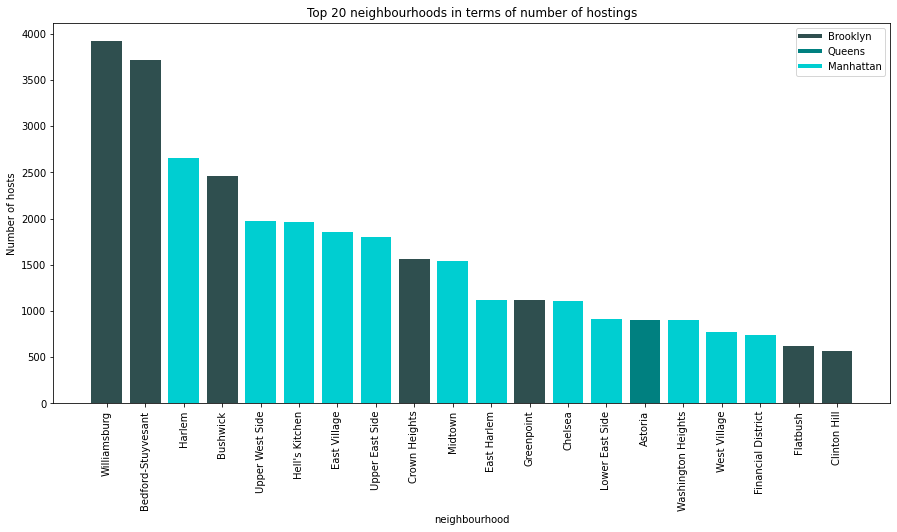

In [20]:
#----------------------Block 16----------------------------------

#visualising the same
plt.figure(figsize=(15,7))
from matplotlib.lines import Line2D
borough_dict = {} #initialising an empty dictionary to store the colour representation of boroughs
unique_borough = set(list(top_20_neighbourhood['borough']))
borough_list = list(top_20_neighbourhood['borough'])
color_list=[] #initialising an empty list for storing the colour of each bar in bar plot
color=['darkslategray','teal','darkturquoise']
index=0
for borough in unique_borough:
  borough_dict[borough] =color[index] #assigning unique colour that represents each borough
  index=index+1
for borough in borough_list:   
       color_list.append(borough_dict[borough]) #storing the colour of each bar of bar plot in color_list
plt.bar(top_20_neighbourhood['neighbourhood'],top_20_neighbourhood['num of hostings'],color=color_list) #plotting a bar plot
# creating a custom labels for a graph
labels = list(borough_dict.keys())
custom_lines = [Line2D([1,2,5,5], [1,2,5,5], color='darkslategray', lw=4),
                Line2D([1,2,5,5], [1,2,5,5], color='teal', lw=4),
                Line2D([1,2,5,5], [1,2,5,5], color='darkturquoise', lw=4)]
plt.xticks(rotation = 90)
plt.legend(custom_lines,labels)
plt.xlabel('neighbourhood')
plt.ylabel('Number of hosts')
plt.title("Top 20 neighbourhoods in terms of number of hostings")

*From the above graph we can see that :*

* Among top 20 neighbourhoods most of these neighbourhood belongs to Manhattan borough.
*Although If looking for top 3 densely hosted neighbourhood top 2 belongs to Brooklyn.

###**Neighbourhoods each borough have**

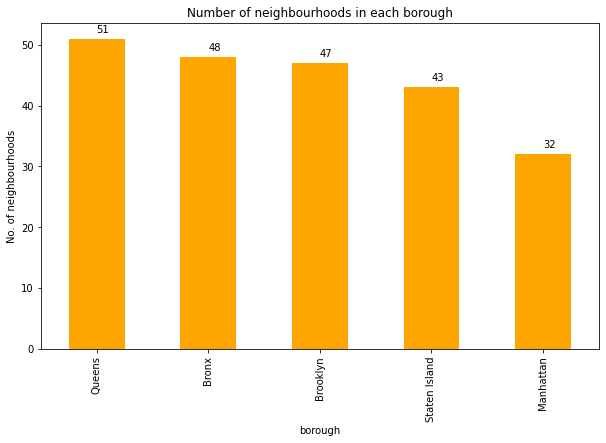

In [21]:
#----------------------Block 17----------------------------------

fig = plt.figure(figsize=(10,6)) #defining figure
ngbrhood = airbnbNY_data.groupby('borough')['neighbourhood'].nunique().sort_values(ascending=False) # number of unique neighbourhoods in each borough
ngbrhood.plot.bar(color='orange')  # bar plot
plt.ylabel('No. of neighbourhoods')
plt.title('Number of neighbourhoods in each borough')
for ind, val in enumerate(ngbrhood):
  plt.text(x = ind, y =val+1, s = str(val))  #plotting the numbers over the bar

*Although Mahnhattan and Brooklyn have most no. of hostings but in terms of neighbourhood they are quite back.*

*Reason for it can be Manhattan and Brooklyn have most tourist places and many hostings has been bunched around under same neigbourhood. Thus having most hostings without having much of neighbourhoods.*

###**Lets look for the price distribution in each boroughs**

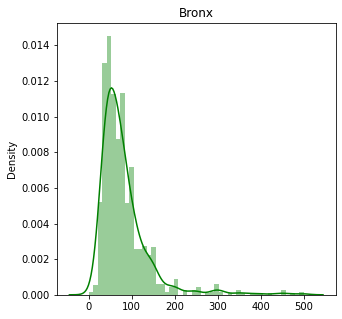

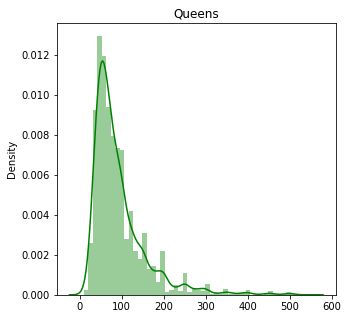

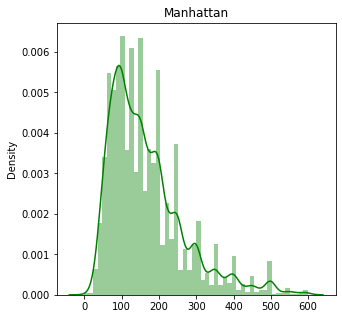

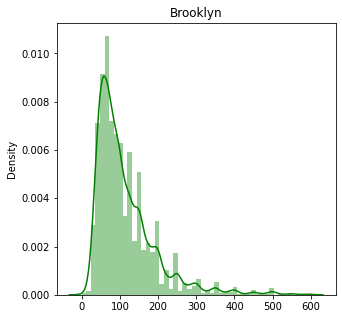

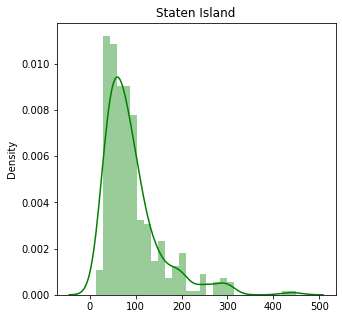

In [22]:
#----------------------Block 18----------------------------------

boroughs = set(list(airbnbNY_data['borough'])) # storing distinct boroughs
for borough in boroughs:
  fig = plt.figure(figsize=(5,5))
  axs = fig.gca()  # gca--> get current axis
  price_dist = list(airbnbNY_data[airbnbNY_data['borough']== borough]['price'])# list of price for each borough
  price_dist = [price for price in price_dist if price < 600] # Limiting price value to 600 to avoid outliers that limits our visualisation
  axs.set_title(borough)
  sns.distplot(price_dist, ax=axs,color='green')  #distribution plot

*Note as told earlier as needed here we have done an outlier treatment.*

*Even after removing outliers still the data is bit skewed. We can further decrease the threshold of price also.*

*For Manhattan price range mostly varies between 80-250 approx.*

*For Brooklyn price range mostly varies between 40-110 approx.*

*For Bronx its quite low and somewhere limits between 30-80.*

*Staten Island and Queens is quite similar and is somewhere ends up nearby or less than 100.*

*Note : Prices are heavily influenced by the outliers .I have set an threshold of price 600 in order to avoid outlier so that we can visualize the range better.*

###**Lets check how does an average price varies in each borough**

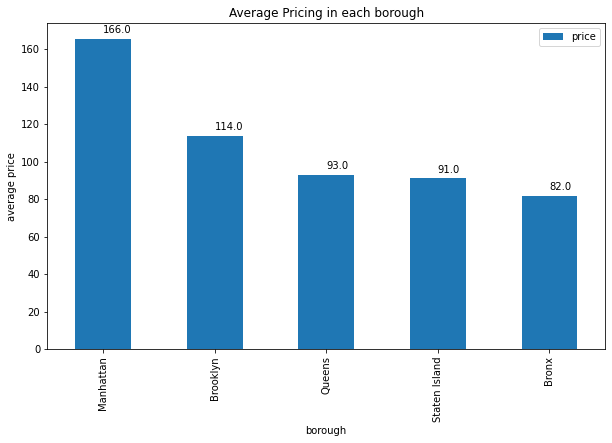

In [23]:
#----------------------Block 19----------------------------------

fig= plt.figure(figsize=(10,6))
axes = fig.gca()
avgprice_df = airbnbNY_data[airbnbNY_data['price']<600]  # creating sub dataframe with price less than 600
avgprice_borough = avgprice_df.groupby('borough').agg({'price':'mean'}).sort_values(by='price',ascending = False)#grouping by borough and averaging out by price
avgprice_borough.plot.bar(ax = axes)  # bar plot
plt.title('Average Pricing in each borough')
avgprice = list(np.around(avgprice_borough.values.reshape(5,))) #rounding up and storing average price of each borough in a list
axes.set_ylabel('average price')
for ind, val in enumerate(avgprice):
  axes.text(x = ind, y =val+3, s = str(val))

* Manhattan is one of the borough that charges quite high for hostings followed by Brooklyn.

* Manhattan include most of the tourist places including Times Square that can be the reason of this price hikes.


###**Lets check the same in terms of price for each neighbourhood**

Text(0.5, 1.0, '10 Neighbourhoods having highest average prices')

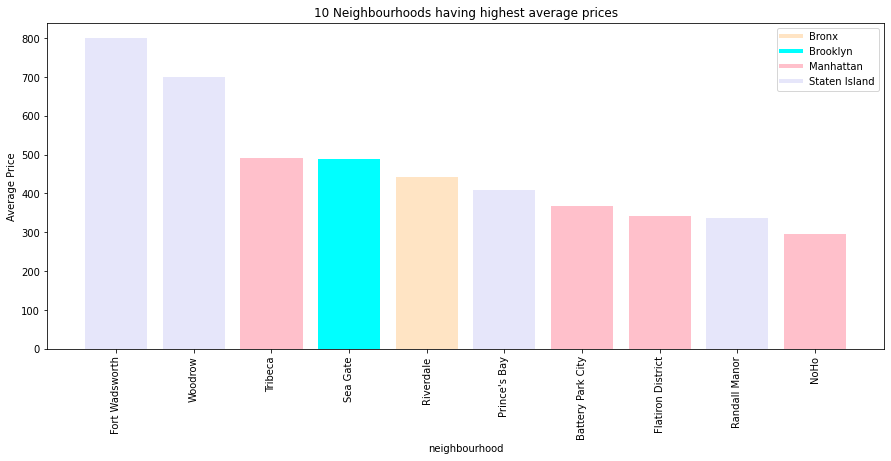

In [24]:
#----------------------Block 20----------------------------------

#Seperating out the top 10 neighbourhoods with highest average charges
avgprice_neighbourhood = airbnbNY_data.groupby(['borough','neighbourhood']).agg({'price':'mean'}).reset_index().sort_values(by='price',ascending=False)[0:10]
plt.figure(figsize=(15,6))
borough_dict = {}   #dictionary to store unique borough and color label associated with it 
unique_borough = set(list(avgprice_neighbourhood['borough']))  # seperating out the unique borough names from sub dataframe
borough_list = list(avgprice_neighbourhood['borough'])  #listing out all observations boroughs from sub dataframe
color_list=[]  # list to store the color associated with bar plots
color=['bisque','cyan','pink','lavender','red']
index=0 
for borough in unique_borough:
  borough_dict[borough] =color[index]
  index=index+1
for borough in borough_list:   
       color_list.append(borough_dict[borough])
plt.bar(avgprice_neighbourhood['neighbourhood'],avgprice_neighbourhood['price'],color=color_list)
labels = list(borough_dict.keys())
custom_lines = [Line2D([0], [0], color='bisque', lw=4),  # custom limes for label of bar graph 
                Line2D([0], [0], color='cyan', lw=4),
                Line2D([0], [0], color='pink', lw=4),
                Line2D([0], [0], color='lavender', lw=4),
                Line2D([0], [0], color='red', lw=4)]
plt.xticks(rotation = 90)
plt.legend(custom_lines,labels)
plt.xlabel('neighbourhood')
plt.ylabel('Average Price')
plt.title("10 Neighbourhoods having highest average prices")

*Staten Islands neighbourhoods seems to have some of the top chargable rentals and Manhattan follows them. Although from our previous analysis it seems that Manhattan is one of the expensive borough but still We have to investigate it a bit further as this might be the result of strong outliers as well. So lets visualize box plots for these 10 neighbourhoods to know if they actually have a higher prices or its just some strong outliers.*

In [25]:
#----------------------Block 21----------------------------------

# nghbrhood function to segregate the dataframe only for top 10 neighbours
def nghbrhood(col):
  if col in neighbourhood_lst:
    return True
  else:
    return False

Text(0.5, 1.0, 'Price distribution in top 10 neighbourhoods')

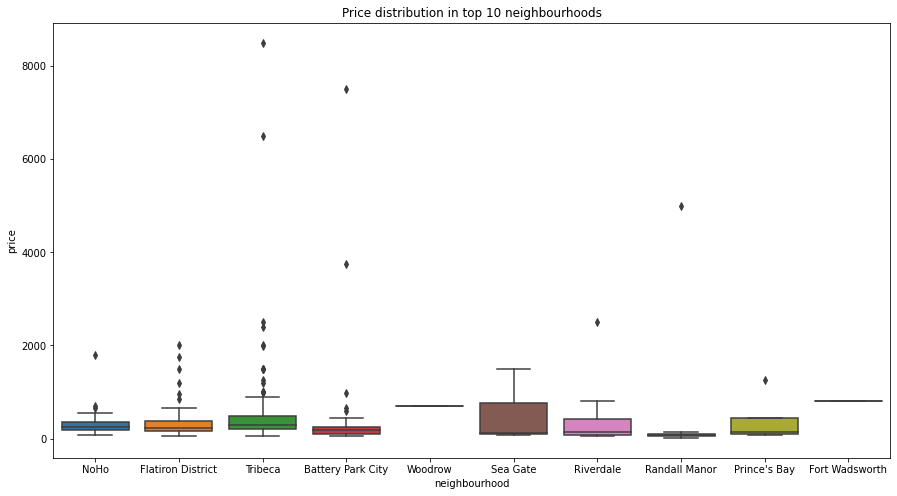

In [26]:
#----------------------Block 22----------------------------------

neighbourhood_lst = list(avgprice_neighbourhood['neighbourhood'])
plt.figure(figsize=(15,8))
df_nghbrhoodprice = airbnbNY_data[airbnbNY_data['neighbourhood'].apply(nghbrhood)]  #applying above defined function 
sns.boxplot(x='neighbourhood',y='price', data = df_nghbrhoodprice )  # boxplot
plt.title('Price distribution in top 10 neighbourhoods')

*So as thought it seems that Fort Wadsworth and Woodrow doesn't have multiple entries they both only have one listing, Fort Wadsworth with price nearby 800 and Woodsrow having a price nearby 700.*

*Whereas Tribeca, Flatiron district and battery part city is heavily influenced by the outliers.*

*Prince's bay and River Dales are the ones that doesnt seems to be affected by the outlier and in general have higher prices.*

*Lets see if we try with the threshold price of 600 how does result varies.*

Text(0.5, 1.0, '10 Neighbourhoods having highest average prices')

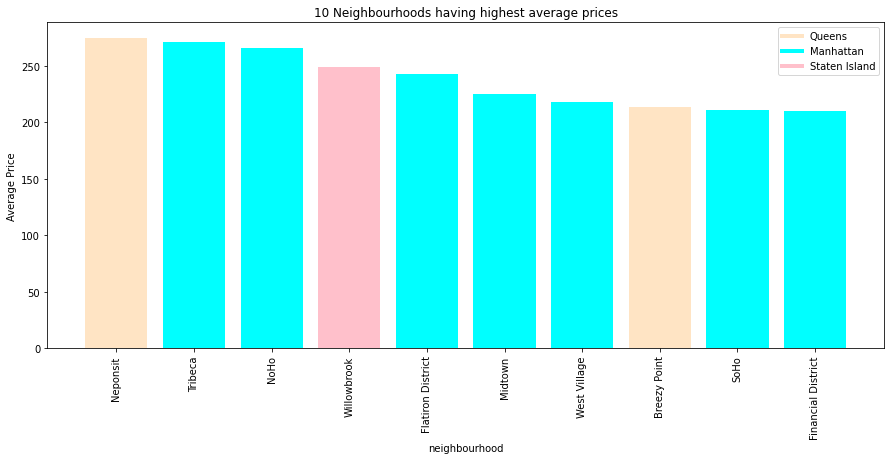

In [27]:
#----------------------Block 23----------------------------------

#Seperating out the top 10 neighbourhoods with highest average charges having price threshold 600
avgprice_neighbourhood = avgprice_df.groupby(['borough','neighbourhood']).agg({'price':'mean'}).reset_index().sort_values(by='price',ascending=False)[0:10]
plt.figure(figsize=(15,6))
borough_dict = {}   #dictionary to store unique borough and color label associated with it 
unique_borough = set(list(avgprice_neighbourhood['borough']))  # seperating out the unique borough names from sub dataframe
borough_list = list(avgprice_neighbourhood['borough'])  #listing out all observations boroughs from sub dataframe
color_list=[]  # list to store the color associated with bar plots
color=['bisque','cyan','pink','blue','red']
index=0
for borough in unique_borough:
  borough_dict[borough] =color[index]
  index=index+1
for borough in borough_list:   
       color_list.append(borough_dict[borough])
plt.bar(avgprice_neighbourhood['neighbourhood'],avgprice_neighbourhood['price'],color=color_list)
labels = list(borough_dict.keys())
custom_lines = [Line2D([0], [0], color='bisque', lw=4),  # custom limes for label of bar graph 
                Line2D([0], [0], color='cyan', lw=4),
                Line2D([0], [0], color='pink', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]
plt.xticks(rotation = 90)
plt.legend(custom_lines,labels)
plt.xlabel('neighbourhood')
plt.ylabel('Average Price')
plt.title("10 Neighbourhoods having highest average prices")

Text(0.5, 1.0, 'Price distribution in top 10 neighbourhoods')

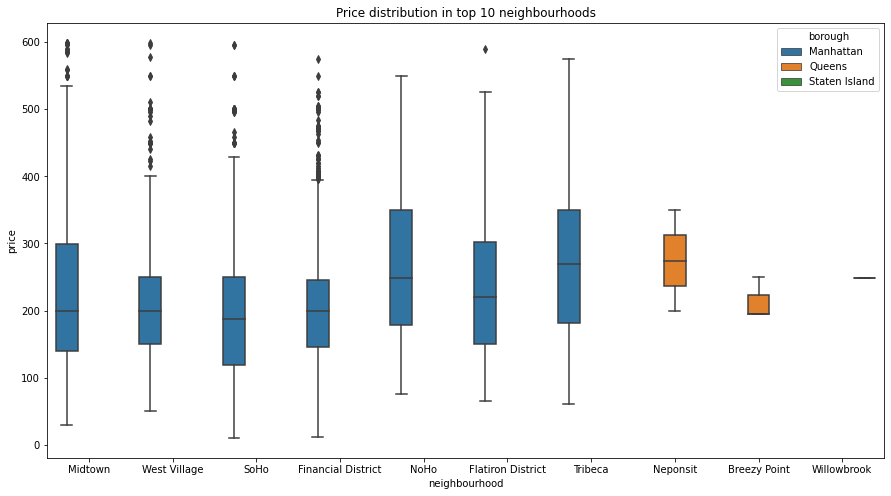

In [28]:
#----------------------Block 24----------------------------------
neighbourhood_lst = list(avgprice_neighbourhood['neighbourhood'])
plt.figure(figsize=(15,8))
df_nghbrhoodprice = avgprice_df[avgprice_df['neighbourhood'].apply(nghbrhood)]  #applying above defined function 
sns.boxplot(x='neighbourhood',y='price', hue='borough',data = df_nghbrhoodprice)  # boxplot
plt.title('Price distribution in top 10 neighbourhoods') #adding title to the plot

*As we have changed a price threshold to 600 picture changes pretty much thus these neighhbourhood prices are influenced by outliers. You can also try changing multiple threshold and can visualize how the graph and neighbourhood changes* 

###**We have played pretty much along with area and collected an info :**


*1. Among all 5 boroughs Manhattans and Brooklyn are the ones who have most rentals. Manhattan is the most famous tourism borough and that is one of the reasons for most rentals.*

*2. Although Manhattan dominates in no. of hostings but neighbourhoods of Brooklyn dominates on first 2 positions in among top 20 neighbourhoods. Still if we quantify the result than we see we have most number of Manhattan neighbourhoods tooks a place among top 20 neighbourhood.*

*3. Williamsburg is a hip neighbourhood in Brooklyn that draws the young and the fashionable to its chic boutiques, trendy cafes and buzzy restaurants. Street art brightens residential thoroughfares and repurposed factories, while the waterfront provides stunning views of Manhattan and seasonal venues for outdoor concerts and food markets.*

*4.Number of neighbourhood is highest in Queens and lowest in Manhattan still Manhattan has most no. of rentals.*

*5. Due to this tourism factor average price of rentals is higher in Manhattan and after Manhattan Brooklyn follows it.*

*6. Price data contains too many outliers, mostly the price of hotel saturates at max near 500-600 but we have some rentals charging as high as 10000. Thus creating a bias in average prices. We have tried to visualize the price data among different neighbourhoods and in that case also after outlier treatment out of top higest pricing neighbourhood 7 belongs to Manhattan.*


##***2. Visualising and analysing about different room types***

In [29]:
#----------------------Block 25----------------------------------

#unique room_type values 
airbnbNY_data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

###**Lets check the room type feature**

Text(0, 0.5, 'counts')

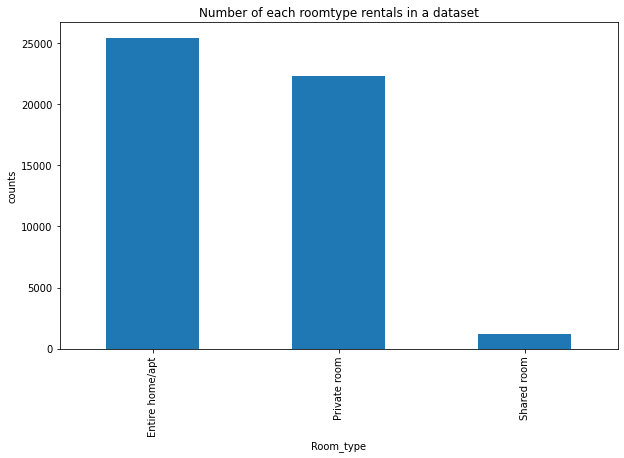

In [30]:
#----------------------Block 26----------------------------------

plt.rcParams['figure.figsize']=(10,6) #defining figure
airbnbNY_data['room_type'].value_counts().plot.bar() # counts of each room type
plt.title('Number of each roomtype rentals in a dataset')
plt.xlabel('Room_type')
plt.ylabel('counts')

*Mostly rentals are there for entire home or private rooms and just very few in case of shared room. Shared room might be not much prefered by visitiors.*

###**Lets check how room types are divided in each borough**

In [31]:
#----------------------Block 27----------------------------------

#looking how room_types are divided in each borough
roomtype_in_borough = airbnbNY_data.groupby(['borough','room_type']).agg({'room_type':'count'}) #grouping by borough and roomtype, and counting number of different room type in each borough then
roomtype_in_borough = roomtype_in_borough.unstack() #to change wide table to a long table
roomtype_in_borough

room_type                         
room_type     Entire home/apt Private room Shared room
borough                                               
Bronx                     379          652          60
Brooklyn                 9559        10132         413
Manhattan               13199         7982         480
Queens                   2096         3372         198
Staten Island             176          188           9

In [32]:
#----------------------Block 28----------------------------------

roomtype_in_borough.columns #to check for columns of the dataframe

MultiIndex([('room_type', 'Entire home/apt'),
            ('room_type',    'Private room'),
            ('room_type',     'Shared room')],
           names=[None, 'room_type'])

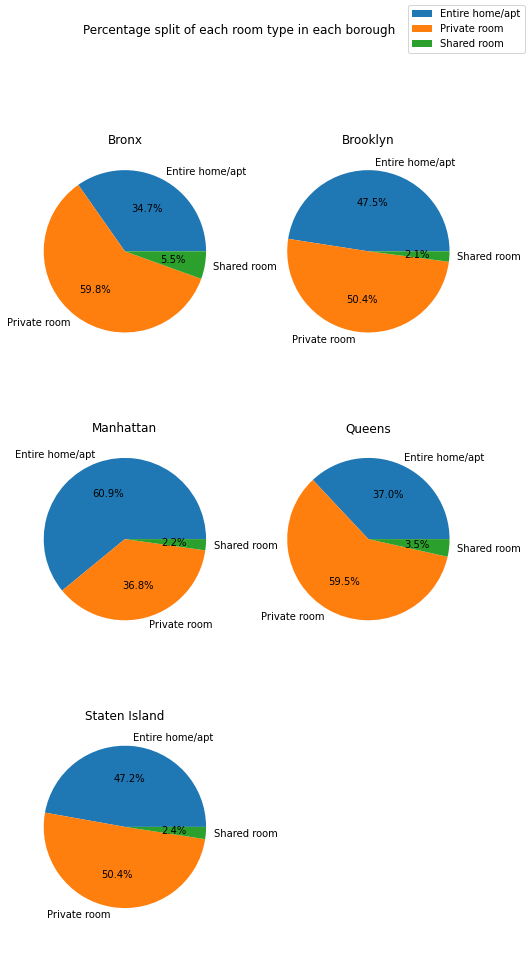

In [33]:
#----------------------Block 29----------------------------------

#plotting the pie charts for each borough to get the percentage split visualization of different room types 
plt.rcParams['figure.figsize'] = (8, 15) #defining figure
fig, axes = plt.subplots(3,2) #creating figure and multiple axes(3*2=6)
fig.suptitle('Percentage split of each room type in each borough') #to give a main title for all plots of 6 axes
label=[]
k=0
for i in range(3):
  label.append(roomtype_in_borough.columns[i][1]) #storing different room types in the list
for i in range(3):
  for j in range(2):
    if i == 2 and j==1:
      break
    axes[i,j].pie(roomtype_in_borough.iloc[k],labels=label, autopct='%1.1f%%',radius=1) # plotting pie chart for each borough in different axes
    axes[i,j].set_title(list(roomtype_in_borough.index)[k]) #setting title as the name of borough for each pie plot 
    k=k+1
plt.figlegend(label) #to place a legend(room type) in the figure
axes[2][1].set_axis_off() #to turn off the axes[2][1]


*In each borough shared room is very negligent.*

*One thing noticable is that among all boroughs only Manhattan has more number of entire home than private rooms. Other than Manhattan in each borough private room takes up that place.*

###**Lets check on how does prices distributed among these room types**

Text(0.5, 1.0, 'Box plot for the prices of room type')

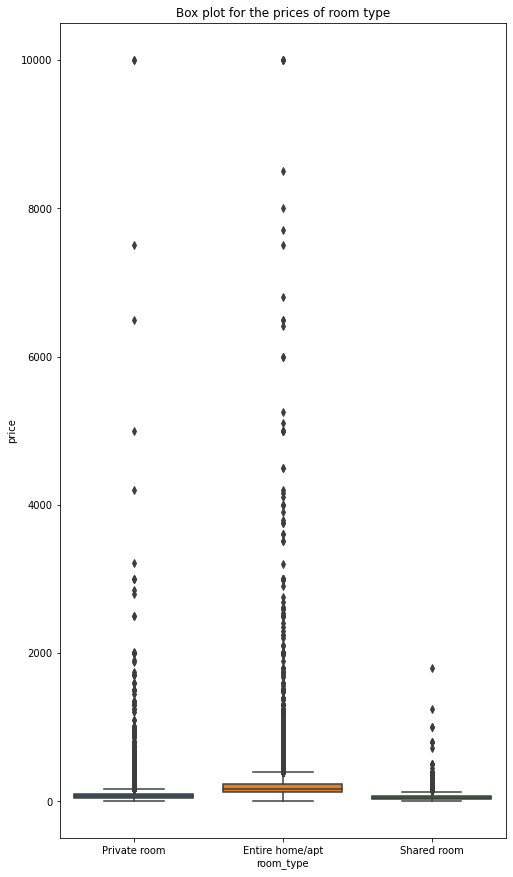

In [34]:
#----------------------Block 30----------------------------------

sns.boxplot(x='room_type', y='price', data = airbnbNY_data) # price dist box plot
plt.title('Box plot for the prices of room type')

*Our prices of each room type is strongly influenced by the outliers.*

*For each roomtype maximum price saturates at nearby 300-400 and above that mostly are outliers.*

Text(0.5, 1.0, 'Box plot for the prices of room type after treating outliers')

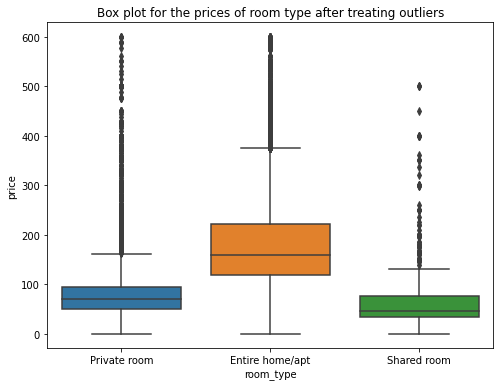

In [35]:
#----------------------Block 31----------------------------------
plt.rcParams['figure.figsize'] = (8, 6)
price_df = airbnbNY_data[airbnbNY_data['price']<600] #sub dataframe to treat outliers
sns.boxplot(x='room_type', y='price', data = price_df) 
plt.title('Box plot for the prices of room type after treating outliers')

*Note :  Although we have removed whole lot outliers but some are still there and we have to bear with them.*

*For entire apartments price range is varying till 370 approx and a median or an average value somewhere lies nearby 140-150.*

*For private room price range is varying till 250 approx rest are still  outliers and a median or an average value somewhere lies nearby 70-80.*

*For shared rooms price range is varying till 80 approx and a median or an average value somewhere lies nearby 40-50.*


###**Now lets see whether every borough have a nearby same average price range or it differs**

In [36]:
#----------------------Block 32----------------------------------

#average price of each roomtype in each borough
#taken a subdataframe with rmoved outliers so that outliers doesn't affect the average price much 
average_price = price_df.groupby(['borough','room_type']).agg({'price':'mean'}).reset_index() #grouping by borough and room type and averaging on price then
average_price

,borough,room_type,price
0,Bronx,Entire home/apt,122.486702
1,Bronx,Private room,61.272727
2,Bronx,Shared room,47.254237
3,Brooklyn,Entire home/apt,161.836750
4,Brooklyn,Private room,71.607585
5,Brooklyn,Shared room,48.890777
6,Manhattan,Entire home/apt,207.179467
7,Manhattan,Private room,104.308734
8,Manhattan,Shared room,84.085954
9,Queens,Entire home/apt,139.125000


Text(0.5, 1.0, 'Average Price of each room type in each borough')

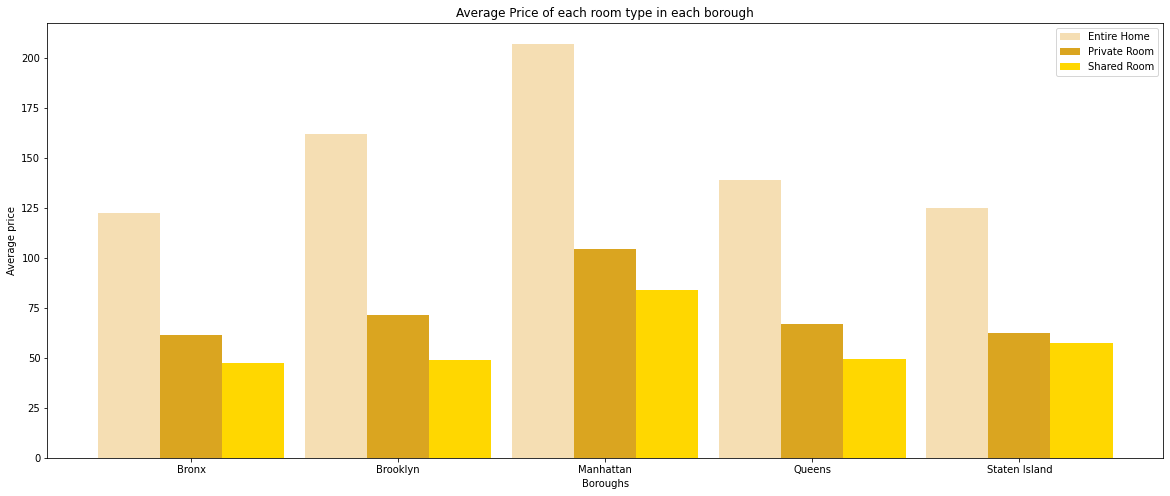

In [37]:
#----------------------Block 33----------------------------------

#plotting the summary of average prices
plt.figure(figsize=(20,8))
entire_home = average_price[average_price['room_type']=='Entire home/apt'] #to create a Sub dataframe from average price dataframe where room type is entire room
private_room = average_price[average_price['room_type']=='Private room'] #to create a Sub dataframe from average price dataframe where room type is private room
shared_room =  average_price[average_price['room_type']=='Shared room'] #to create a Sub dataframe from average price dataframe where room type is shared room
x_axis=np.arange(len(entire_home['borough'])) #to get evenly spaced values within range of len(entire_home['borough'])
plt.bar(x_axis-0.3,entire_home['price'],label ='Entire Home',color='wheat',width=0.3) #to get first bar stick of group of three bars
plt.bar(x_axis,private_room['price'],label ='Private Room',color='goldenrod',width=0.3) #to get second bar stick of group of three bars
plt.bar(x_axis+0.3,shared_room['price'],label ='Shared Room',color='gold',width=0.3) #to get third bar stick of group of three bars
plt.legend() #to place legend in the figure
plt.xticks(x_axis,entire_home['borough'])
plt.xlabel('Boroughs')
plt.ylabel('Average price')
plt.title("Average Price of each room type in each borough")

*Manhattan is leading in a scoreboard of higher prices and Brooklyn follows Manhattan.*

*Manhattan and Brooklyn are tourist areas in NYC and as everywhere rule higher the tourism, higher the prices of rentals also applies here.*  

###**Which room type has most number of reviews**

Text(0.5, 1.0, 'Total number of reviews each room type have')

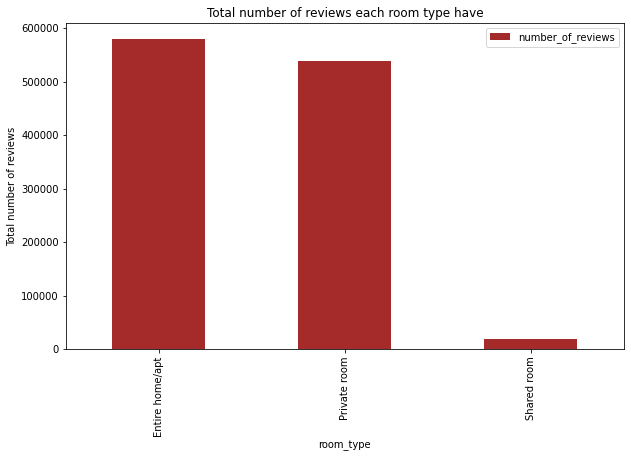

In [38]:
#----------------------Block 34----------------------------------

roomtype_reviews = airbnbNY_data.groupby('room_type').agg({'number_of_reviews':'sum'}) #grouping on room type and adding the number of reviews then
plt.rcParams['figure.figsize']=(10,6)
roomtype_reviews.plot.bar(color='brown')
plt.ylabel('Total number of reviews')
plt.title('Total number of reviews each room type have')

*Number of reviews follow the same pattern as of the availabilities of each room type in listings. We have most no. of entire homes in our listings and so do reviews for them are most. It goes in same fashion for private and shared room as well.*  

###**After analysis of various factors about roomtype we have gathered following info :**

*1 Entire homes are one of the most available rental in New York City whereas shared room are very less preferable.* 

*2. In every borough private rooms are more in counts whereas in Manhattan entire home wins this race.*

*3. For entire homes nearby 75% of rentals are under the price of 200 and in private room its somewhere near 100 and for shared ones its 75 somewhere.*

*4 Manhattan is most expensive borough in each of the room types, Brooklyn follows Manhattan, then Queens and Staten Island and Bronx are somewhere at same place.*



##***3. Visualising and analysing about hosts***

In [39]:
#---------------------Block 35----------------------------

#Checking for unique values in host id
airbnbNY_data['host_id'].nunique()

37457

*We have 37457 unique hosts in our data. Rest are duplicates and have appeared multiple times in data.* 

*Calculated host listing counts means no. of listings specific host have in our data. For example say host id 2009___ something have calculated host listing value 6 then that host id has 6 listings in our data. We'll verify that as well.*

In [40]:
#---------------------Block 36----------------------------

#sum of unique host listing count for unique host ids
x = airbnbNY_data.groupby('host_id').agg({'calculated_host_listings_count':'unique'}).values
x=x.reshape(x.shape[0],)
sum(list(x))

array([48895])

In [41]:
#---------------------Block 37----------------------------
# Just picking up a row to get host_id and its respective host listing counts
airbnbNY_data.iloc[0:1]

,id,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365


*So the host id 2787 has calculated host listing count value as 6. Lets check if thats true.* 

In [42]:
#---------------------Block 38----------------------------
#Selecting all the observations with host id 2787
airbnbNY_data[airbnbNY_data['host_id']==2787]

,id,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
10372,7937553,2787,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,0.50,6,153
13583,10160215,2787,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,0.40,6,174
13688,10267242,2787,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,0.64,6,180
13963,10593675,2787,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,0.43,6,180
21556,17263207,2787,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,0.70,6,360


*So the host has total of 6 listings in Brooklyn borough.*

###**Lets look for some of the top and busiest host in our dataset**

*Note we have considered here the host to be top or busiest if they have more number of rentals.*

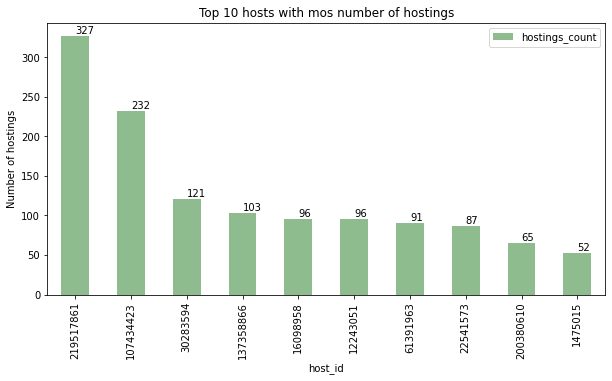

In [43]:
#---------------------Block 39----------------------------

#grouping by host_id and then counting the ids to know the no. of times host id has appeared
top_host = airbnbNY_data.groupby('host_id').agg({'id':'count'}).sort_values(by = 'id', ascending = False)[0:10] #grouping by on host_id and counting their numbers
top_host.rename(columns = {'id':'hostings_count'},inplace =True) # renaming the column 'id' with hosting counts
plt.rcParams['figure.figsize']=(10,5)
top_host.plot.bar(color='darkseagreen')
plt.ylabel('Number of hostings')
plt.title('Top 10 hosts with mos number of hostings')  #title for bar plot
for i,host_count in enumerate(list(top_host['hostings_count'])):
  plt.text(x=i, y = host_count+3, s= str(host_count)) #to write a text over the top of bar sticks


*There is a steep decrease in each for top 3 host counts and also they have too many hostings in it.* 

*Now we'll try to dig a bit deep on these hosts*


###**Lets look for how calculated host listing is distributed**

Text(0.5, 1.0, 'Distribution of Host listing count')

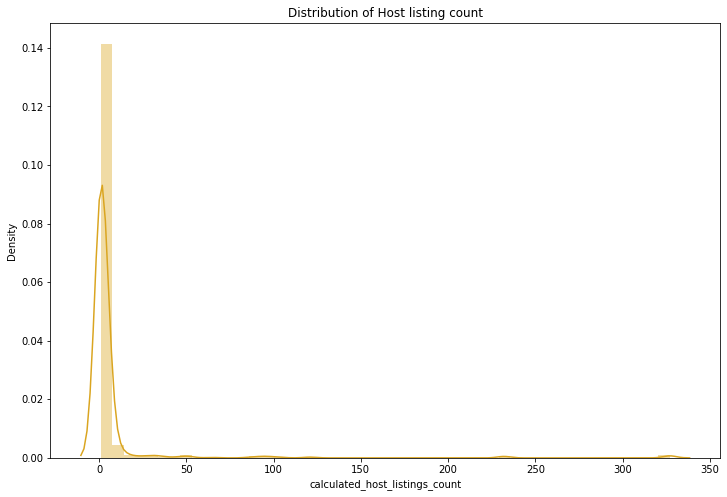

In [44]:
#-------------------------block 39-a---------------------------------

plt.rcParams['figure.figsize']=(12,8)
sns.distplot(airbnbNY_data['calculated_host_listings_count'],color='goldenrod') #distribution plot for calculated host listing count
plt.title('Distribution of Host listing count')

Text(0.5, 1.0, 'Distribution of Host listing count with a threshold of host listing count as 10')

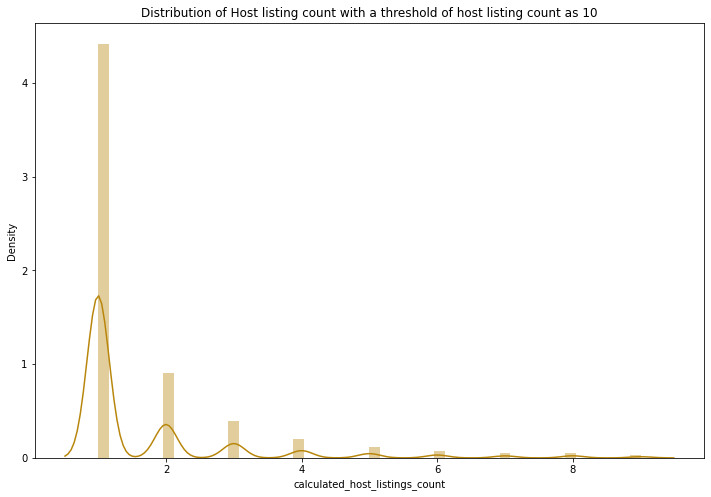

In [45]:
#-------------------------block 39-b---------------------------------

sns.distplot(airbnbNY_data[airbnbNY_data['calculated_host_listings_count']<10]['calculated_host_listings_count'],color='darkgoldenrod') #distribution plot for calculated host listing count with calculated host listing count<10
plt.title('Distribution of Host listing count with a threshold of host listing count as 10')

*From above two blocks we came to know that having a host listing counts of 327 or so and even having a host lising count greater than one is rare in our dataset. Most host has only 1 rentals thus a value of calculated host listing count as 1.*

In [46]:
#---------------------Block 40----------------------------

#function to create a sub dataframe only with these top 10 hosts 
def host_selector(col):
  if col in top_host.index:
    return True
  else:
    return False

In [47]:
#---------------------Block 41----------------------------

#applying previous defined function in block 40 to create a sub dataframe with name tophost_df 
tophost_df = airbnbNY_data[airbnbNY_data['host_id'].apply(host_selector)]
tophost_df['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
1475015       52
Name: host_id, dtype: int64

### **Lets see in which borough/neighbourhood these top 10 hosts have most of their hostings,room type offered by these hosts and price distribution for these hosts**


In [48]:
#---------------------Block 42----------------------------

tophost_df.groupby('host_id')['borough'].value_counts()  #grouping by host id and then creating a series with borough and having their value counts

host_id    borough  
1475015    Manhattan     52
12243051   Manhattan     96
16098958   Manhattan     96
22541573   Manhattan     86
           Brooklyn       1
30283594   Manhattan    121
61391963   Manhattan     91
107434423  Manhattan    230
           Brooklyn       2
137358866  Queens        79
           Manhattan     18
           Brooklyn       6
200380610  Manhattan     65
219517861  Manhattan    327
Name: borough, dtype: int64

*Manhattan is a winning borough in this case if you see out of the 10 hosts 7 have all their hostings in Manhattan whereas for rest 3 most of their hostings in Manhattan except host id 137358866.*



*Now we have seen that most of them belongs to Mahnhattan borough.*

**Now lets look for the neighbourhoods that these hosts occupied**

Text(0.5, 1.0, 'Neighbourhoods in which top 10 hosts have their hostings')

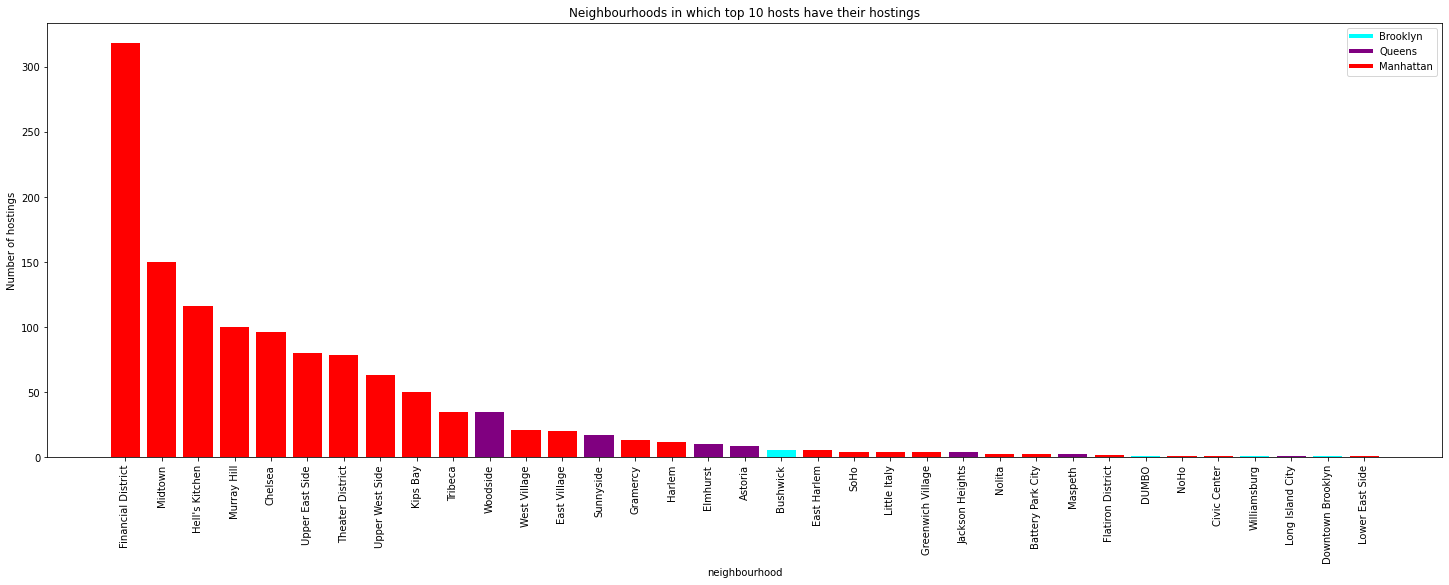

In [49]:
#---------------------Block 43----------------------------
#Checking for the neighbourhood and their hosting counts in top host sub dataframe 
tophost_nghbrhood = tophost_df.groupby(['borough','neighbourhood']).agg({'id':'count'}).sort_values(by = 'id',ascending =False).reset_index()
tophost_nghbrhood.rename(columns={'id':'count'}, inplace = True) #renaming the column names
unique_borough= set(list(tophost_nghbrhood['borough'])) #to store unique boroughs of tophost_nghbrhood dataframe
borough_dict ={} #initialising an empty dictionary
index = 0 
color = ['cyan','purple','red','orange','green']
for borough in unique_borough:
  borough_dict[borough] = color[index] #storing boroughs as key and color as value in the dictionary
  index = index +1
color_list=[] 
for borough in tophost_nghbrhood['borough']:
  color_list.append(borough_dict[borough]) #storing different colors in the list according to the borough
plt.figure(figsize=(25,8))
plt.bar(tophost_nghbrhood['neighbourhood'], tophost_nghbrhood['count'], color = color_list) 
labels = list(borough_dict.keys())
#to get labelling on plot
custom_lines = [Line2D([0], [0], color='cyan', lw=4), 
                Line2D([0], [0], color='purple', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='green', lw=4)]
plt.xticks(rotation = 90) #to rotate x-ticks by 90 degree
plt.legend(custom_lines,labels)#to get legend
plt.xlabel('neighbourhood')
plt.ylabel('Number of hostings')
plt.title("Neighbourhoods in which top 10 hosts have their hostings")

*Top and major neighbourhoods comes under Manhattan and are the major attraction of tourists. Thats the reason of multiple hostings are there in these neighbourhood.*

In [50]:
#---------------------Block 44----------------------------

#grouping by host id and room type then counting number of rooms of that particular type for that particular host_id
tophost_df.groupby(['host_id','room_type']).agg({'id':'count'}) 

id
host_id   room_type           
1475015   Entire home/apt   52
12243051  Entire home/apt   96
16098958  Entire home/apt   95
          Private room       1
22541573  Entire home/apt   87
30283594  Entire home/apt  121
61391963  Entire home/apt   91
107434423 Entire home/apt  232
137358866 Entire home/apt    2
          Private room     101
200380610 Entire home/apt   65
219517861 Entire home/apt  319
          Private room       8

*Ok so mostly they offer entire home only with just few of them offering private rooms and no shared rooms*

**Lets check on how the price of these hosts differs from the average price of boroughs. As most of them only have entire homes only so will check for that only**

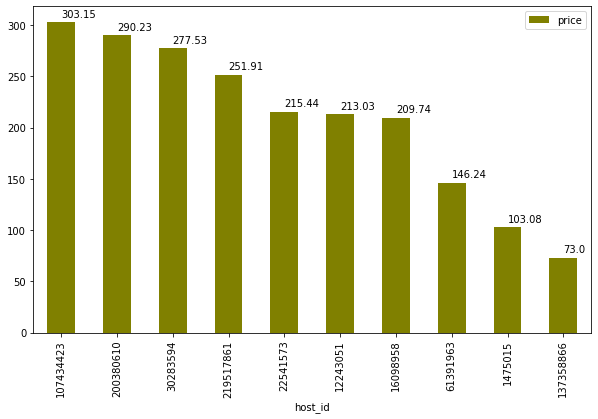

In [51]:
#---------------------Block 45----------------------------

avgprice = tophost_df.groupby(['host_id','room_type']).agg({'price':'mean'}).reset_index() #grouping by host id and room type then averaging the price for that particular room and that particular host
avgprice = avgprice[avgprice['room_type']=='Entire home/apt'].reset_index().sort_values(by = 'price',ascending=False) #creating a subdataframe from avgprice dataframe where room type is entire home
fig = plt.figure(figsize=(10,6))
ax = fig.gca() #to get current axes
avgprice.plot.bar(x='host_id', y='price', ax = ax,color='olive')
for i,price in enumerate(list(avgprice['price'])):
  ax.text(x=i,y = price+5, s = str(round(price,2)))


*Initially in block 29 when we plotted the box plot we saw tha the median or an average price of entire home lies somewhere near 160-170 and also from block 31 we can see that the average entire home prices in Manhattan is 180 as most of these host belongs to Manhattan only.* 

*But there we have removed the outliers by setting a price threshold with 600 so lets try that here as well to see actual price differences among other hosts and these hosts.*

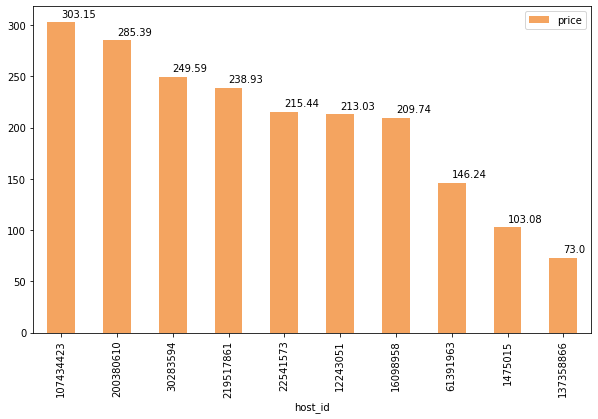

In [52]:
#---------------------Block 46----------------------------

#applying the same thing as in block 45 but setting price threshold as 350
price_350 = tophost_df[tophost_df['price']<600] #to create a subdataframe from tophost_df where price <600
avgprice = price_350.groupby(['host_id','room_type']).agg({'price':'mean'}).reset_index()
avgprice = avgprice[avgprice['room_type']=='Entire home/apt'].reset_index().sort_values(by = 'price',ascending=False)
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
avgprice.plot.bar(x='host_id', y='price', ax = ax,color='sandybrown')
for i,price in enumerate(list(avgprice['price'])):
  ax.text(x=i,y = price+5, s = str(round(price,2)))

*So even after setting a threshold as 600 for price there is not much change in average prices and nearly them appears to be higher than average prices we have seen in block 28.*

*So we can draw following conclusions. - Generally most of these top hosts might have luxurious apartments and most of them some where have a charge higher than the average charges we have seen earlier in block 29 and 31.*


###**So collected info about hosts are :**

*1. We have 37k + unique hosts in our dataset.*

*2. Most host has single rentals only. Although there are also such host having rentals as high as 327, then in 200s, 100s and 50s but general population in our dataset has 1 only.*

*3. All these top host mostly belongs to Manhattan. Out of total rentals that these top 10 hosts combinely have only 88 from them is in other boroughs rest all are in Manhattan.*

*4. Financial district neighbourhood is the one where all these top host mostly have their rentals.*

*5. When trying to check, is it the price that sets these host difference it actually came into notice that these host in general have higher price than the average price in their respective boroughs. So it might following a phenomena of brand value as we all know the higher the brand value higher the price. Yeah and also along with some good facilities.*

##***4. Visualising and analysing about prices***

###**Lets check for the distribution of prices**

In [53]:
#---------------------Block 47----------------------------

#details of price
airbnbNY_data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Price distribution')

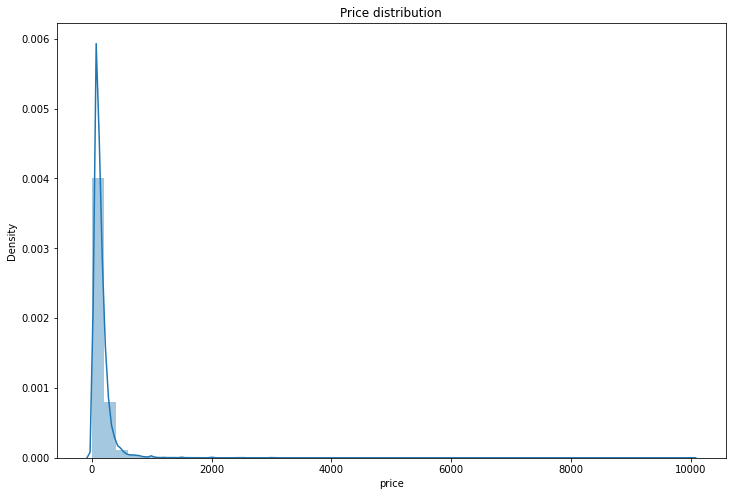

In [54]:
#---------------------Block 48----------------------------

#distribution of prices
sns.distplot(airbnbNY_data['price'])
plt.title('Price distribution')

Text(0.5, 1.0, 'Price distribution with threshold value of price as 600')

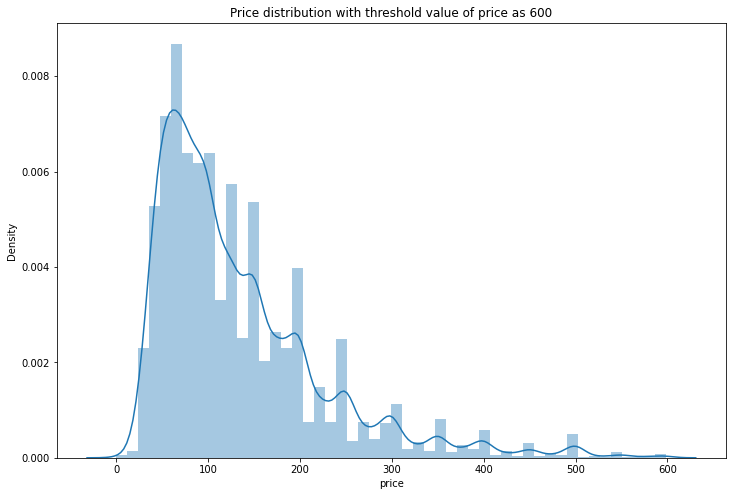

In [55]:
#---------------------Block 49----------------------------

#distribution of price under price value 600 to avoid outliers
sns.distplot(airbnbNY_data[airbnbNY_data['price']<600]['price'])
plt.title('Price distribution with threshold value of price as 600')

*Yeah so from above three blocks we got a knowledge that*

*1. our price distribution have too much of outliers values*

*2. Even after outliers treatment our price data is highly skewed with most of rentals having price under 300*

###**Lets see does number of reviews have any effect on price** 

Text(0, 0.5, 'Price')

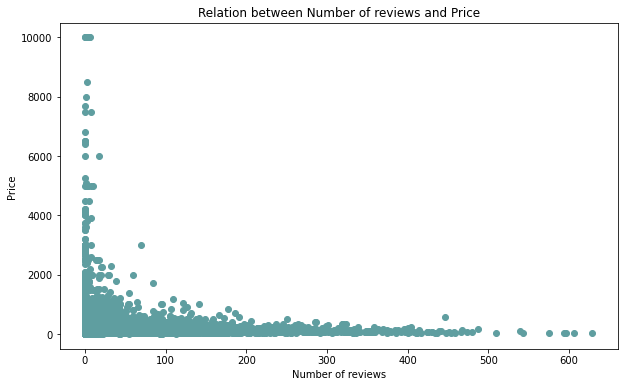

In [56]:
#---------------------Block 50----------------------------

#scatter plot between number of reviews and Price
plt.figure(figsize=(10,6))
plt.scatter(airbnbNY_data['number_of_reviews'], airbnbNY_data['price'],color='cadetblue')
plt.title('Relation between Number of reviews and Price')
plt.xlabel('Number of reviews')
plt.ylabel('Price')

*Although there doesn't seems to be any exact relation due to outliers in Price but one insight we got is generally one with higher number of reviews have lower prices*


Text(0, 0.5, 'Price')

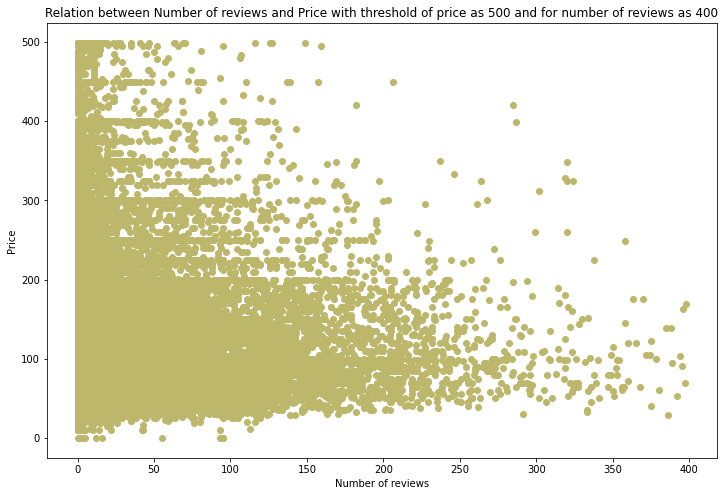

In [57]:
#---------------------Block 51----------------------------

#scatter plot between number of reviwews and price with removig outliers from both.
test = airbnbNY_data[((airbnbNY_data['number_of_reviews']<400)) & (airbnbNY_data['price']<500)]
plt.scatter(test['number_of_reviews'], test['price'],color='darkkhaki')
plt.title('Relation between Number of reviews and Price with threshold of price as 500 and for number of reviews as 400')
plt.xlabel('Number of reviews')
plt.ylabel('Price')

In [58]:
#---------------------Block 52----------------------------

# checking correlation value for outlier treated and not treated data
corr = airbnbNY_data['price'].corr(airbnbNY_data['number_of_reviews'])
print("Correlation coefficient with outliers : ", corr)
corr1 = test['price'].corr(test['number_of_reviews'])
print("Correlation coefficient after outliers removal : ", corr1)

Correlation coefficient with outliers :  -0.04795422658266219
Correlation coefficient after outliers removal :  -0.04209473168745154


*After outliers treatments, by seeing correlation coefficient it seems that both number of reviews and price doesn't relate that much.*

###**Lets see does minimum nights have any effect on price** 

Text(0, 0.5, 'Price')

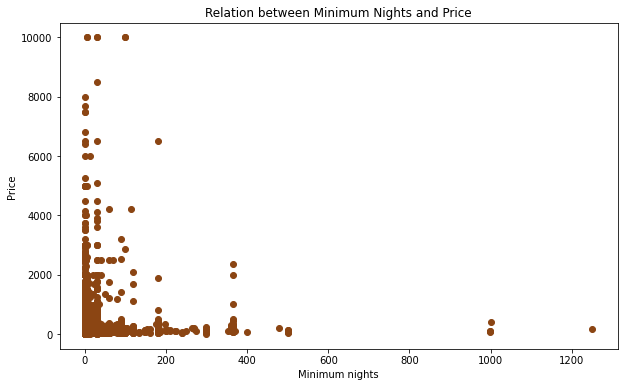

In [59]:
#---------------------Block 53----------------------------

#scatter plot for minimum nights and Price
plt.figure(figsize=(10,6))
plt.scatter(airbnbNY_data['minimum_nights'], airbnbNY_data['price'],color='saddlebrown')
plt.title('Relation between Minimum Nights and Price')
plt.xlabel('Minimum nights')
plt.ylabel('Price')

*There seems to be no exact relation between price and minimunm nights and both minimum nights and price have few outliers.* 

Text(0, 0.5, 'Price')

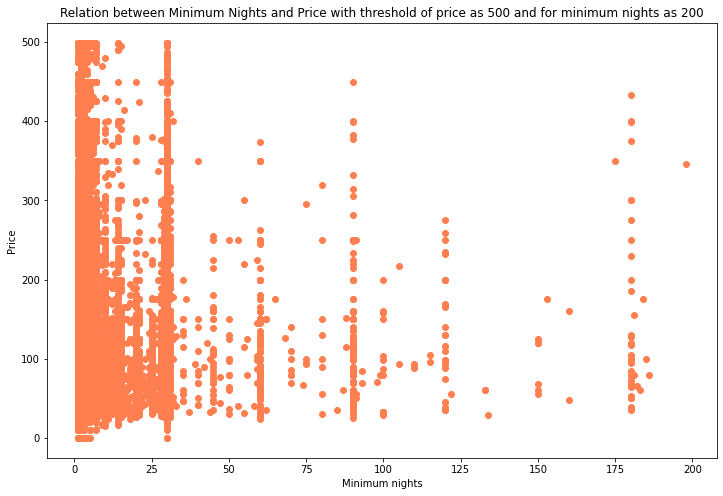

In [60]:
#---------------------Block 54----------------------------
#scatter plot for minimum nights and Price with thresholds on price and minimum nights
test = airbnbNY_data[(airbnbNY_data['minimum_nights']<200) & (airbnbNY_data['price']<500)]
plt.scatter(test['minimum_nights'], test['price'],color='coral')
plt.title('Relation between Minimum Nights and Price with threshold of price as 500 and for minimum nights as 200')
plt.xlabel('Minimum nights')
plt.ylabel('Price')

*Even after testing how does our scatter plot looks after outlier treatment, it seems out to have no correlation between each other.*

In [61]:
#---------------------Block 55----------------------------

# checking correlation value for outlier treated and not treated data
corr = airbnbNY_data['price'].corr(airbnbNY_data['minimum_nights'])
print("Correlation coefficient with outliers : ", corr)
corr1 = test['price'].corr(test['minimum_nights'])
print("Correlation coefficient after outliers removal : ", corr1)

Correlation coefficient with outliers :  0.04279933414330347
Correlation coefficient after outliers removal :  0.040450637126838405


*And the same got proven by our correlation value. There seems to be negligible relation among two. Lets investigate a bit on minimum nights and see if we can bring any informational insight.*

In [62]:
#---------------------Block 56----------------------------

#number of unique values in minimum nights column
airbnbNY_data['minimum_nights'].nunique()

109

*In 49k rows we only have 109 unique values. We can try categorising it and see if we can get any information out of it.*

In [63]:
#---------------------Block 57----------------------------

#descriptive information of minimum nights
airbnbNY_data['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

*So almost 75% of data values lies within 5 where as max value is going upto 1250*

In [64]:
#---------------------Block 58----------------------------

#number of observation having minimum nights value 1
len(airbnbNY_data[airbnbNY_data['minimum_nights'] ==1])

12720

In [65]:
#---------------------Block 59----------------------------

#number of observation having minimum nights value 2
len(airbnbNY_data[airbnbNY_data['minimum_nights'] ==2])

11696

In [66]:
#---------------------Block 60----------------------------

#number of observation having minimum nights value 3
len(airbnbNY_data[airbnbNY_data['minimum_nights'] ==3])

7999

In [67]:
#---------------------Block 61----------------------------

#number of observation having minimum nights value 4
len(airbnbNY_data[airbnbNY_data['minimum_nights'] ==4])

3303

In [68]:
#---------------------Block 62----------------------------

#number of observation having minimum nights value greater than 4
len(airbnbNY_data[airbnbNY_data['minimum_nights'] >4])

13177

*From above 5-6 blocks analysis we got to know that we can divide our minimum night into categories as 1 night, 2 night, 3 night, 4 nights, more than 4 nights.*

In [69]:
#---------------------Block 63----------------------------

#function to convert a numerical value of minimum night to categorical value 
def minnights_cat(col):
  if col==1:
    return '1_night'
  elif col==2:
    return '2_nights'
  elif col==3:
    return '3_nights'
  elif col ==4:
    return '4_nights'
  else:
    return 'more than 4 nights'

In [70]:
#---------------------Block 64----------------------------

#addig categorical column midnight_cat and assigning values to them using above defned function
airbnbNY_data['minnights_cat']= airbnbNY_data['minimum_nights'].apply(minnights_cat)

In [71]:
#---------------------Block 65----------------------------

#value counts of newly created catagorical variable
airbnbNY_data['minnights_cat'].value_counts()

more than 4 nights    13177
1_night               12720
2_nights              11696
3_nights               7999
4_nights               3303
Name: minnights_cat, dtype: int64

Text(0.5, 1.0, 'Boxplot between price and minimum nights')

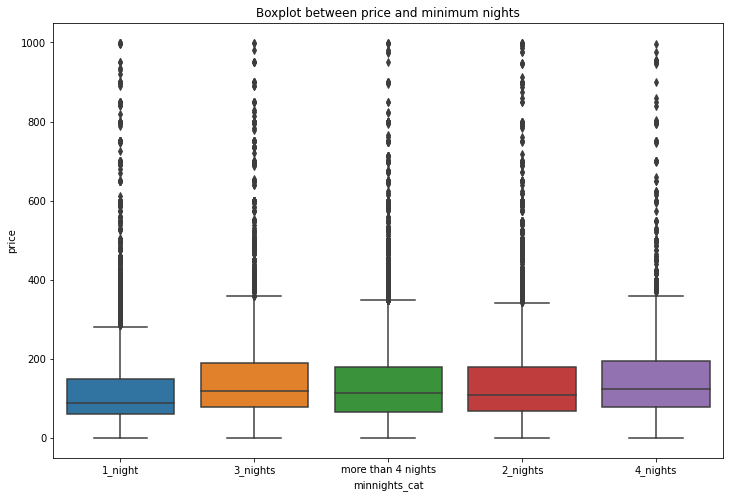

In [72]:
#---------------------Block 66----------------------------

#boxplot for minnight_cat and price
#we have set a threshold of 1000 to avoid outliers
sns.boxplot(x='minnights_cat',y='price',data=airbnbNY_data[airbnbNY_data['price']<1000])
plt.title('Boxplot between price and minimum nights')

*Rentals with booking of 1 minimum nights are the cheapest ones whereas one with 4 nights are coming out to be expensive ones*

###**Lets try looking at relation between price and availability 365**

Text(0, 0.5, 'Price')

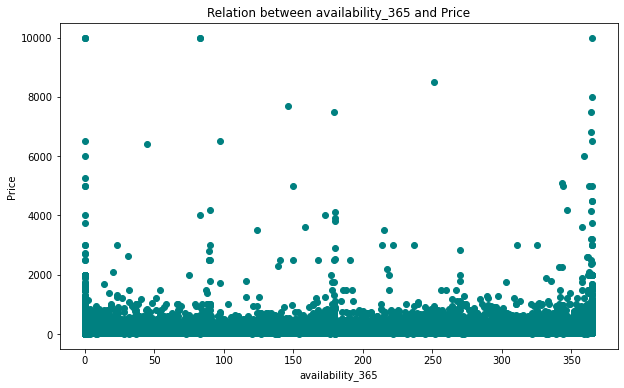

In [73]:
#---------------------Block 67----------------------------

#scatter plot between availability 365 and price
plt.figure(figsize=(10,6))
plt.scatter(airbnbNY_data['availability_365'], airbnbNY_data['price'],color='teal')
plt.title('Relation between availability_365 and Price')
plt.xlabel('availability_365')
plt.ylabel('Price')

In [74]:
#---------------------Block 68----------------------------

#correlation coefficient
corr= airbnbNY_data['availability_365'].corr(airbnbNY_data['price'])
corr

0.08182882742168796

*And Even availability does not relates in any manner with price*

*Lets try the same with avaiability_365 we'll divide the availibilty 365 into four categories*

*1. less than 90 days*

*2. Between 90 and 180 days*

*3. Between 180 and 270 days*

*4. Between 270 and 365 days*

In [75]:
#---------------------Block 69----------------------------

#converting numerical values of availability 365 into catagorical value
def availability(col):
  if col <90:
    return 'less than 90 days'
  elif col>=90 and col<180:
    return 'b/w 90 and 180 days'
  elif col>=180 and col<270:
    return 'b/w 180 and 270 days'
  elif col>=270:
    return 'b/w 270 and 365 days'

In [76]:
#---------------------Block 70----------------------------

#creating new catagorical variable and assigning value to it
airbnbNY_data['availability_cat']= airbnbNY_data['availability_365'].apply(availability)

In [77]:
#---------------------Block 71----------------------------

#unique values and theircount in availability cat
airbnbNY_data['availability_cat'].value_counts()

less than 90 days       28956
b/w 270 and 365 days     9930
b/w 90 and 180 days      5383
b/w 180 and 270 days     4626
Name: availability_cat, dtype: int64

Text(0.5, 1.0, 'Boxplot between availabity_cat and price')

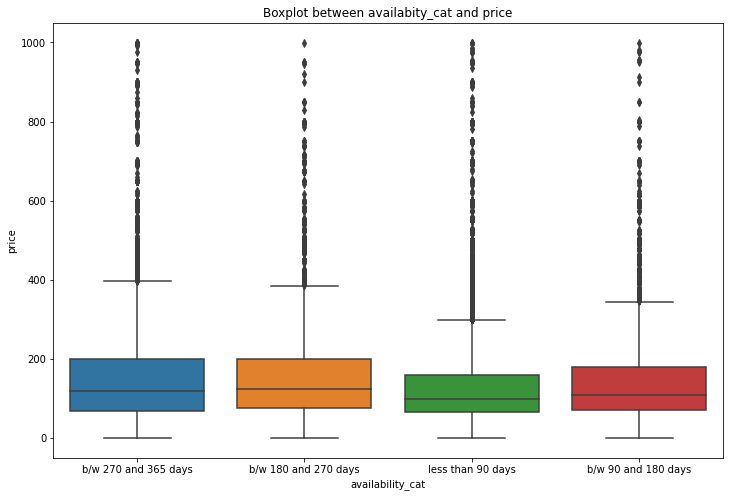

In [78]:
#---------------------Block 72----------------------------

#boxplot for availabilty_cat and price
#we have set a threshold of 1000 to avoid outliers
sns.boxplot(x='availability_cat',y='price',data=airbnbNY_data[airbnbNY_data['price']<1000])
plt.title('Boxplot between availabity_cat and price')

*Rental having less availability (lesser than 90 days) are the cheapest ones) and one between 180 and 270 days are the expensive ones*

###**So here we are done with our price analysis.**

*Note - Price relation with other variables like neighbourhood, room types, etc has been discussed in earlier blocks and conclusions has been drawn.*

*1. Price seems to be very lessly relatable with number of reviews although it seems out that one with more number of reviews are having lesser prices.*

*2. Minimum nights itself does not forming any relation with price although categorising the variable gives us a knowlege that generally rentals with minimum one night offering have lesser prices.*

*3. Rentals whoose availabilty is less than 90 days are generally the ones with lower prices.*

##***5. Analysing availability_365***

In [79]:
#descriptive summary of availabilty 365
airbnbNY_data['availability_365'].describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [80]:
airbnbNY_data['availability_cat'].value_counts()

less than 90 days       28956
b/w 270 and 365 days     9930
b/w 90 and 180 days      5383
b/w 180 and 270 days     4626
Name: availability_cat, dtype: int64

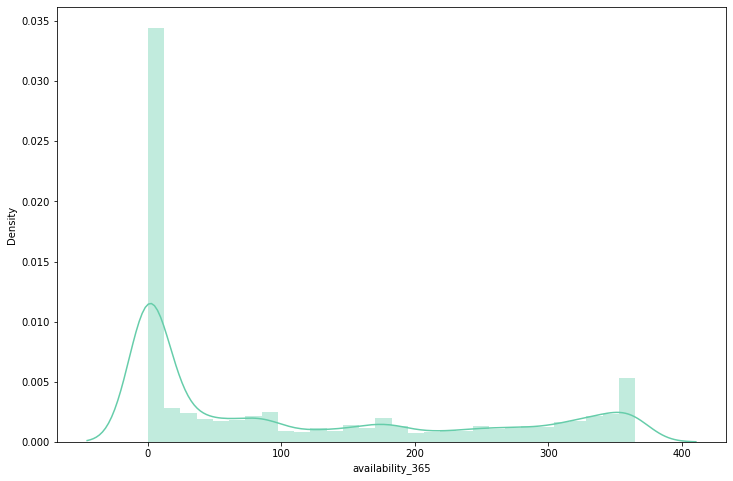

In [81]:
#distribution plot of availability 365
sns.distplot(airbnbNY_data['availability_365'],color='mediumaquamarine')

*Availability 365 has too many values as zero means they do not have any rentals availability in a complete year*

*Now there could be multiple reasons for it*

*1. It is the most famous one and already highly booked they don't have any offerings.*

*2. Or they might haven't accepting bookings.*

**Lets see a bit more on them**

In [82]:
len(airbnbNY_data[airbnbNY_data['availability_365']==0])

17533

*We have approximately 17.5k value as availability 365 as 0.Meaning they are not available for rental for a complete year*

In [83]:
availability_0 = airbnbNY_data[airbnbNY_data['availability_365']==0]

In [84]:
availability_0['borough'].value_counts()

Manhattan        8102
Brooklyn         7844
Queens           1368
Bronx             177
Staten Island      42
Name: borough, dtype: int64

*They are higher and nearby equally divided between Manhattan and Brooklyn with Queens following them, then Bronx and Staten Island.*

In [85]:
availability_0[availability_0['price']<600].groupby(['borough']).agg({'price':'mean'})

,price
borough,
Bronx,76.284091
Brooklyn,103.554189
Manhattan,149.497741
Queens,87.363436
Staten Island,105.243902


*0 Availability rentals in general have lower average prices in each borough except Manhattan. As you can compare it from block. That can be one reason for non availabilty as it might be booked earlier before a year.*

*Coming back to our availabilty_365*

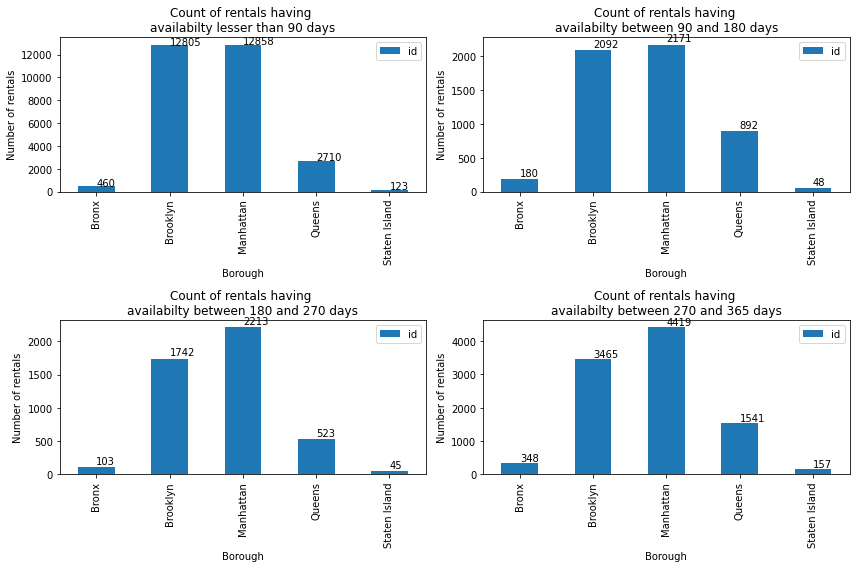

In [86]:
days_90 = airbnbNY_data[airbnbNY_data['availability_cat'] =='less than 90 days'].groupby('borough').agg({'id':'count'})
days_180 = airbnbNY_data[airbnbNY_data['availability_cat'] =='b/w 90 and 180 days'].groupby('borough').agg({'id':'count'})
days_270 = airbnbNY_data[airbnbNY_data['availability_cat'] =='b/w 180 and 270 days'].groupby('borough').agg({'id':'count'})
days_365 = airbnbNY_data[airbnbNY_data['availability_cat'] =='b/w 270 and 365 days'].groupby('borough').agg({'id':'count'})
fig,ax = plt.subplots(2,2)
days_90.plot.bar(ax=ax[0][0])
ax[0][0].set_title('Count of rentals having \navailabilty lesser than 90 days')
ax[0][0].set_ylabel('Number of rentals')
ax[0][0].set_xlabel('Borough')
for i, val in enumerate(list(days_90['id'])):
  ax[0][0].text(x=i, y= val+ 50, s= str(val))
days_180.plot.bar(ax=ax[0][1])
ax[0][1].set_title('Count of rentals having \navailabilty between 90 and 180 days')
ax[0][1].set_ylabel('Number of rentals')
ax[0][1].set_xlabel('Borough')
for i, val in enumerate(list(days_180['id'])):
  ax[0][1].text(x=i, y= val+ 50, s= str(val))
days_270.plot.bar(ax=ax[1][0])
ax[1][0].set_title('Count of rentals having \navailabilty between 180 and 270 days')
ax[1][0].set_ylabel('Number of rentals')
ax[1][0].set_xlabel('Borough')
for i, val in enumerate(list(days_270['id'])):
  ax[1][0].text(x=i, y= val+ 50, s= str(val))
days_365.plot.bar(ax=ax[1][1])
ax[1][1].set_title('Count of rentals having \navailabilty between 270 and 365 days')
ax[1][1].set_ylabel('Number of rentals')
ax[1][1].set_xlabel('Borough')
for i, val in enumerate(list(days_365['id'])):
  ax[1][1].text(x=i, y= val+ 50, s= str(val))
fig.tight_layout()

*Every borough seems to have a same pattern. Each borough has most availabilities for lesser than 90 days. Well thats also the case because no. of observation in lesser than 90 days are bit more*

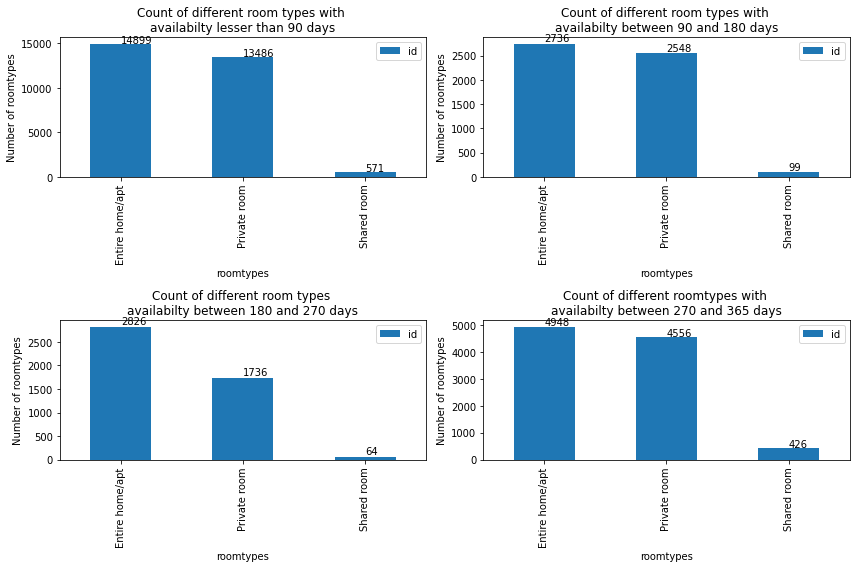

In [87]:
days_90 = airbnbNY_data[airbnbNY_data['availability_cat'] =='less than 90 days'].groupby('room_type').agg({'id':'count'})
days_180 = airbnbNY_data[airbnbNY_data['availability_cat'] =='b/w 90 and 180 days'].groupby('room_type').agg({'id':'count'})
days_270 = airbnbNY_data[airbnbNY_data['availability_cat'] =='b/w 180 and 270 days'].groupby('room_type').agg({'id':'count'})
days_365 = airbnbNY_data[airbnbNY_data['availability_cat'] =='b/w 270 and 365 days'].groupby('room_type').agg({'id':'count'})
fig,ax = plt.subplots(2,2)
days_90.plot.bar(ax=ax[0][0])
ax[0][0].set_title('Count of different room types with \navailabilty lesser than 90 days')
ax[0][0].set_ylabel('Number of roomtypes')
ax[0][0].set_xlabel('roomtypes')
for i, val in enumerate(list(days_90['id'])):
  ax[0][0].text(x=i, y= val+ 50, s= str(val))
days_180.plot.bar(ax=ax[0][1])
ax[0][1].set_title('Count of different room types with \navailabilty between 90 and 180 days')
ax[0][1].set_ylabel('Number of roomtypes')
ax[0][1].set_xlabel('roomtypes')
for i, val in enumerate(list(days_180['id'])):
  ax[0][1].text(x=i, y= val+ 50, s= str(val))
days_270.plot.bar(ax=ax[1][0])
ax[1][0].set_title('Count of different room types \navailabilty between 180 and 270 days')
ax[1][0].set_ylabel('Number of roomtypes')
ax[1][0].set_xlabel('roomtypes')
for i, val in enumerate(list(days_270['id'])):
  ax[1][0].text(x=i, y= val+ 50, s= str(val))
days_365.plot.bar(ax=ax[1][1])
ax[1][1].set_title('Count of different roomtypes with \navailabilty between 270 and 365 days')
ax[1][1].set_ylabel('Number of roomtypes')
ax[1][1].set_xlabel('roomtypes')
for i, val in enumerate(list(days_365['id'])):
  ax[1][1].text(x=i, y= val+ 50, s= str(val))
fig.tight_layout()

*There is no visible relation in from the data like one dominates the other. Its just that lesser than 90 days has most no. of observations under them thats why the counts of lesser than 90 days  is higher here and the category between 180 and 270 days has least no. of observations so count is at lower end.*

*Yeah one thing that is catcable is the difference between private room and entire hiome is very minute in all cases except in the category between 180 and 270 days.*

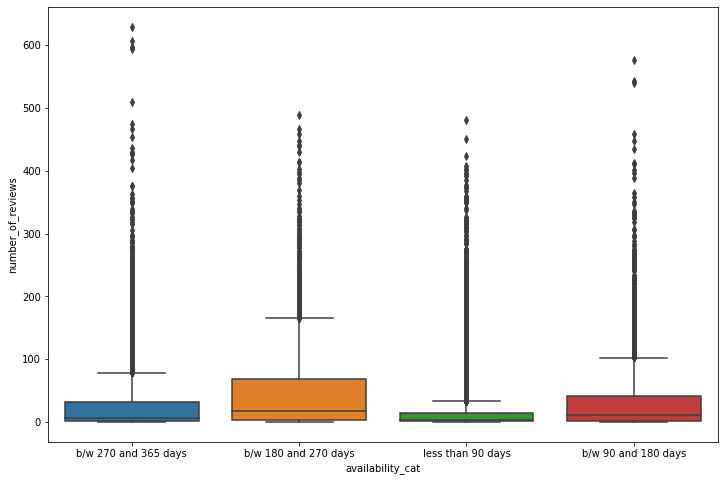

In [88]:
sns.boxplot(x='availability_cat',y='number_of_reviews',data=airbnbNY_data)

*Ones having availability between 180 and 270 days are most reviewed*

In [89]:
import plotly.express as px

lat = np.mean(airbnbNY_data['latitude'])
lon = np.mean(airbnbNY_data['longitude'])


fig = px.density_mapbox(airbnbNY_data, lat='latitude', lon='longitude', z='price', radius=4,
                        center=dict(lat = lat, lon = lon), zoom=30,
                        mapbox_style="carto-positron")
fig.show()

*As we have discussed earlier also from this map its also visible that most Airbnbs are located in Manhattan and Brooklyn only.*

*One thing we can distniguish from this analysis is that most of the boroughs other than Manhattan has majority of their listings located near the bridges that connect them to Manhattan*

*Also most of the heavily priced hotel is also in Manhattan and brooklyn only*